In [1]:
import re
import os
import numpy as np
import pylab as plt
import random

In [2]:
def extract_snr(filename):
    match = re.search(r"SNR=(\d+\.\d{1,3})", filename)
    if match:
        return float(match.group(1))
    else:
        return 0


# Function to load labels from filenames
def load_labels_from_directory(directory):
    labels = []
    filenames = []
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".png"):
                try:
                    snr = extract_snr(filename)
                except ValueError:
                    snr = 0  # Label for noise
                labels.append(snr)
                filenames.append(os.path.join(root, filename))
    return np.array(labels), filenames


labels_data, filenames_data = load_labels_from_directory(
    "/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data"
)

labels_noise, filenames_noise = load_labels_from_directory(
    "/home/arush/GW_Project_1/Data_Generation/Continous_Check/noise"
)


labels = np.concatenate((labels_data, labels_noise))
filenames = np.concatenate((filenames_data, filenames_noise))

combined = list(zip(labels, filenames))

random.seed(42)
random.shuffle(combined)

labels, filenames = zip(*combined)

labels = np.array(labels)
filenames = np.array(filenames)

In [3]:
print(len(labels))

16000


In [4]:
# convert to integers
array = []
for i in range(len(labels)):
    array.append(int(labels[i]))

In [5]:
# count the number of each snr
snr_count = []
for i in range(len(array)):
    snr_count.append(0)

for j in range(len(labels)):
    snr_count[int(labels[j])] += 1

In [6]:
# shortening the array to 21 elements
array_zreoure = []
for k in range(21):
    array_zreoure.append(snr_count[k])

In [7]:
print(array_zreoure)

[16000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Error in callback <function _draw_all_if_interactive at 0x7db2a8032b80> (for post_execute):


KeyboardInterrupt: 

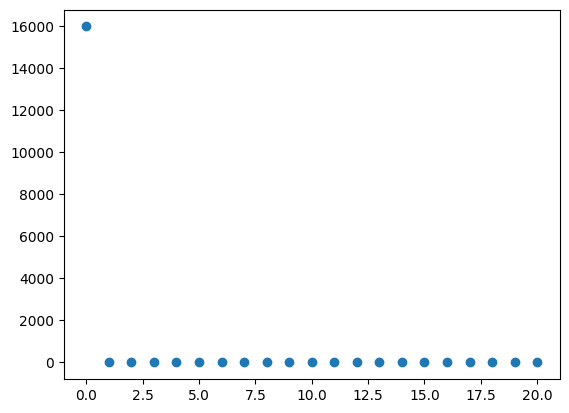

In [8]:
plt.plot(array_zreoure, "o")

/tmp/ipykernel_5474/4111382080.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


    M1     M2    Time     SNR                          ChirpMass
10  22  0.786  14.862  12.718  Continous_Check/Data/signal_0.png
27  14  1.994  16.612  16.747  Continous_Check/Data/signal_1.png
23  29  1.000  22.130  22.453  Continous_Check/Data/signal_2.png
13  30  2.598  15.630  16.902  Continous_Check/Data/signal_3.png
27  23  0.733  21.014  21.680  Continous_Check/Data/signal_4.png


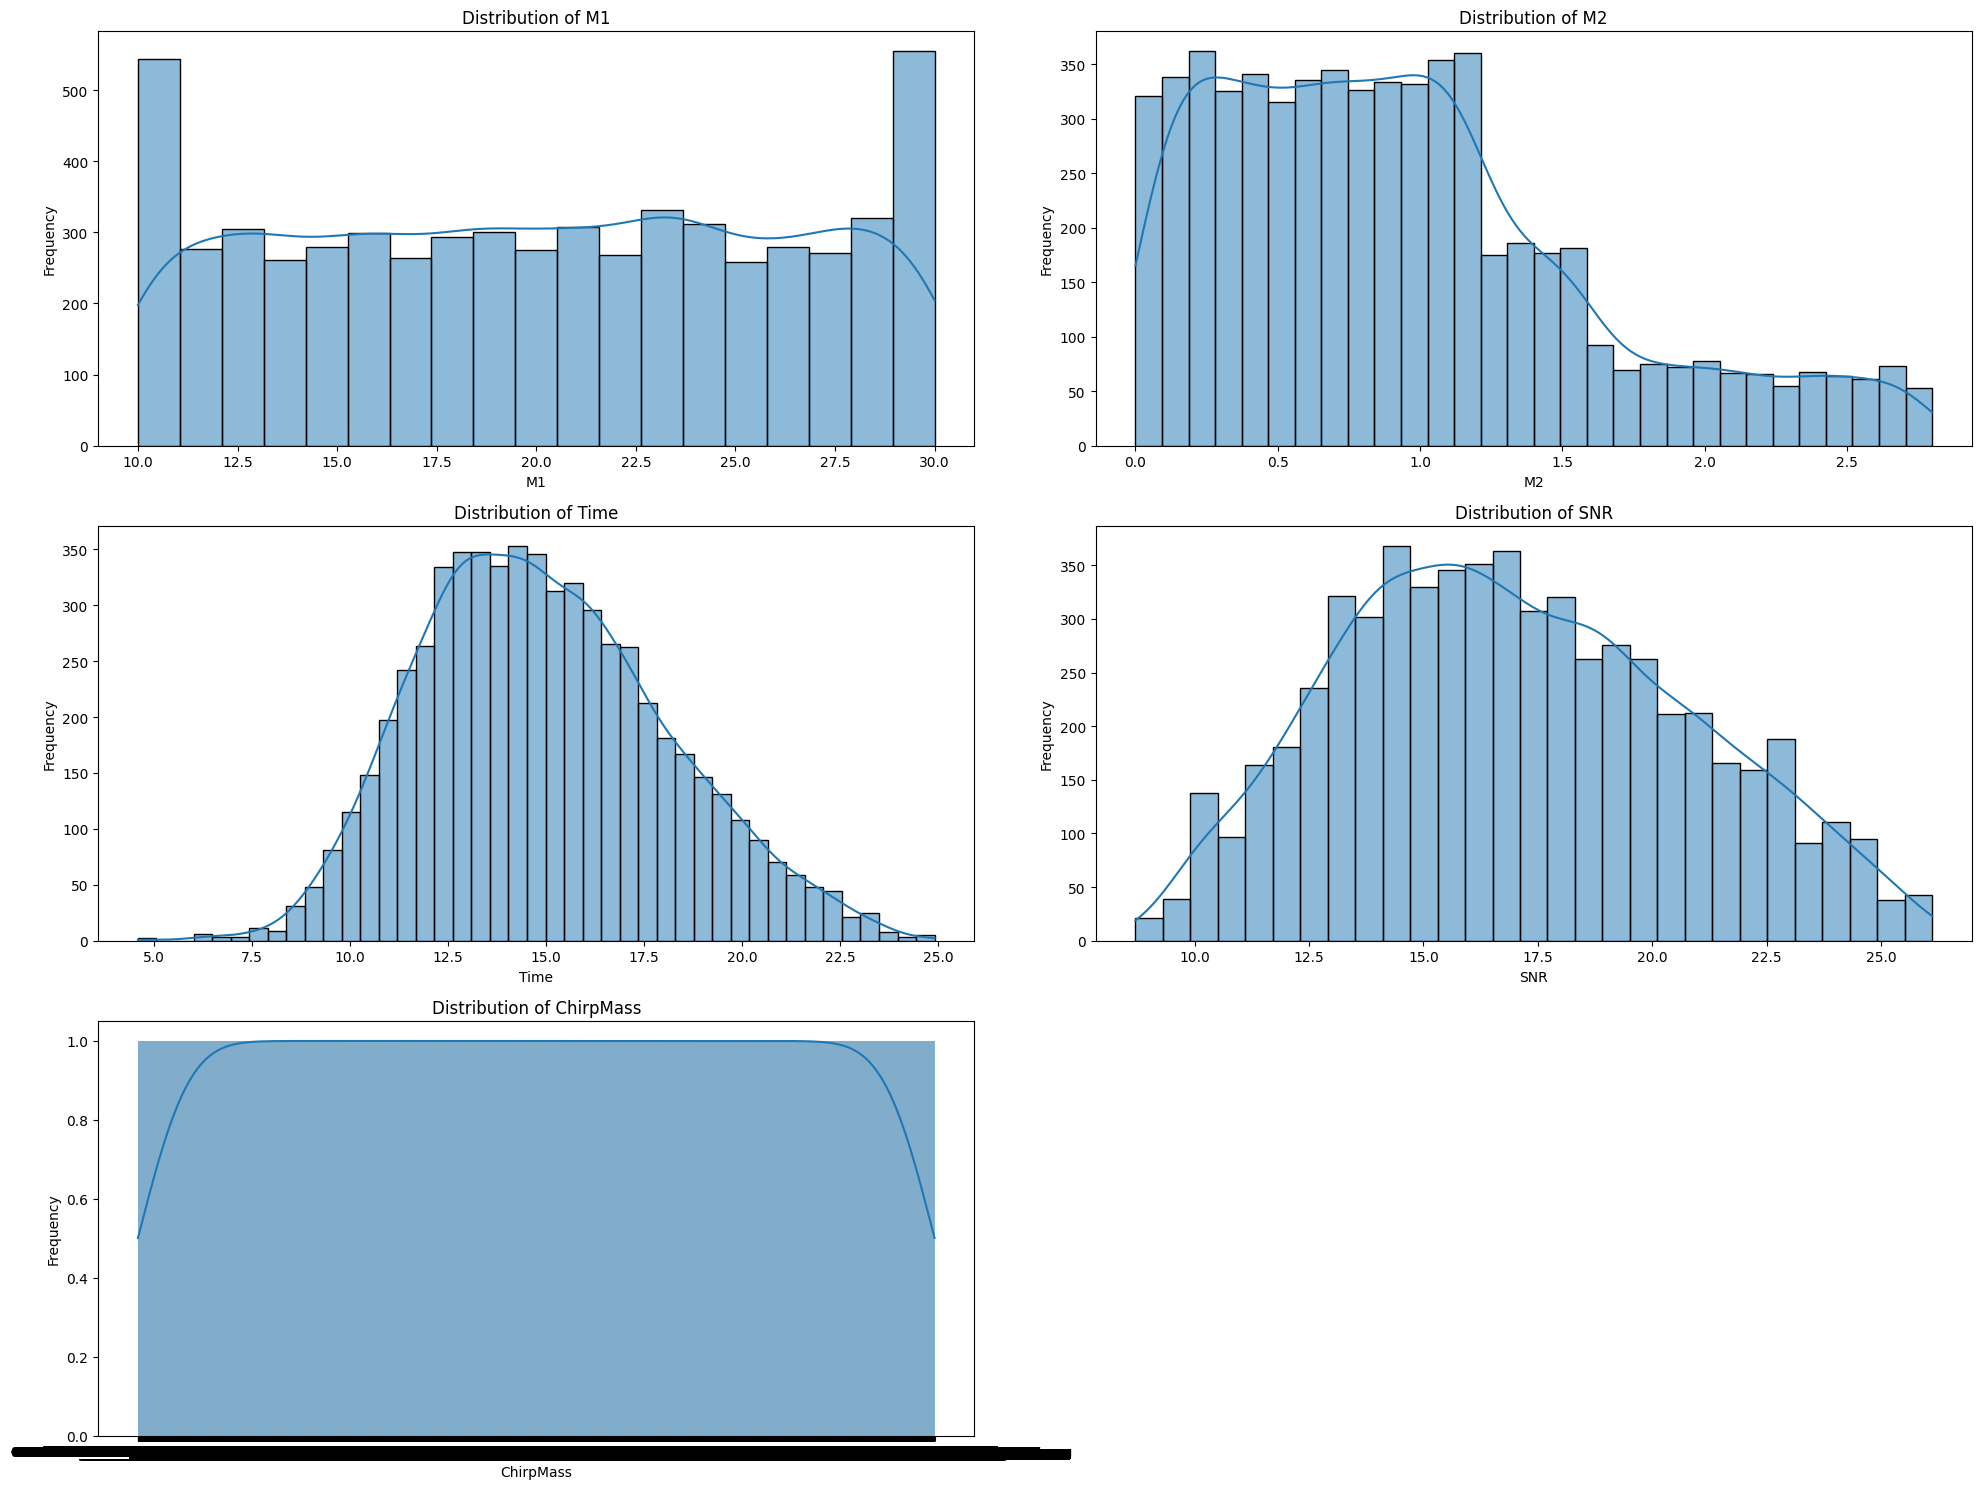

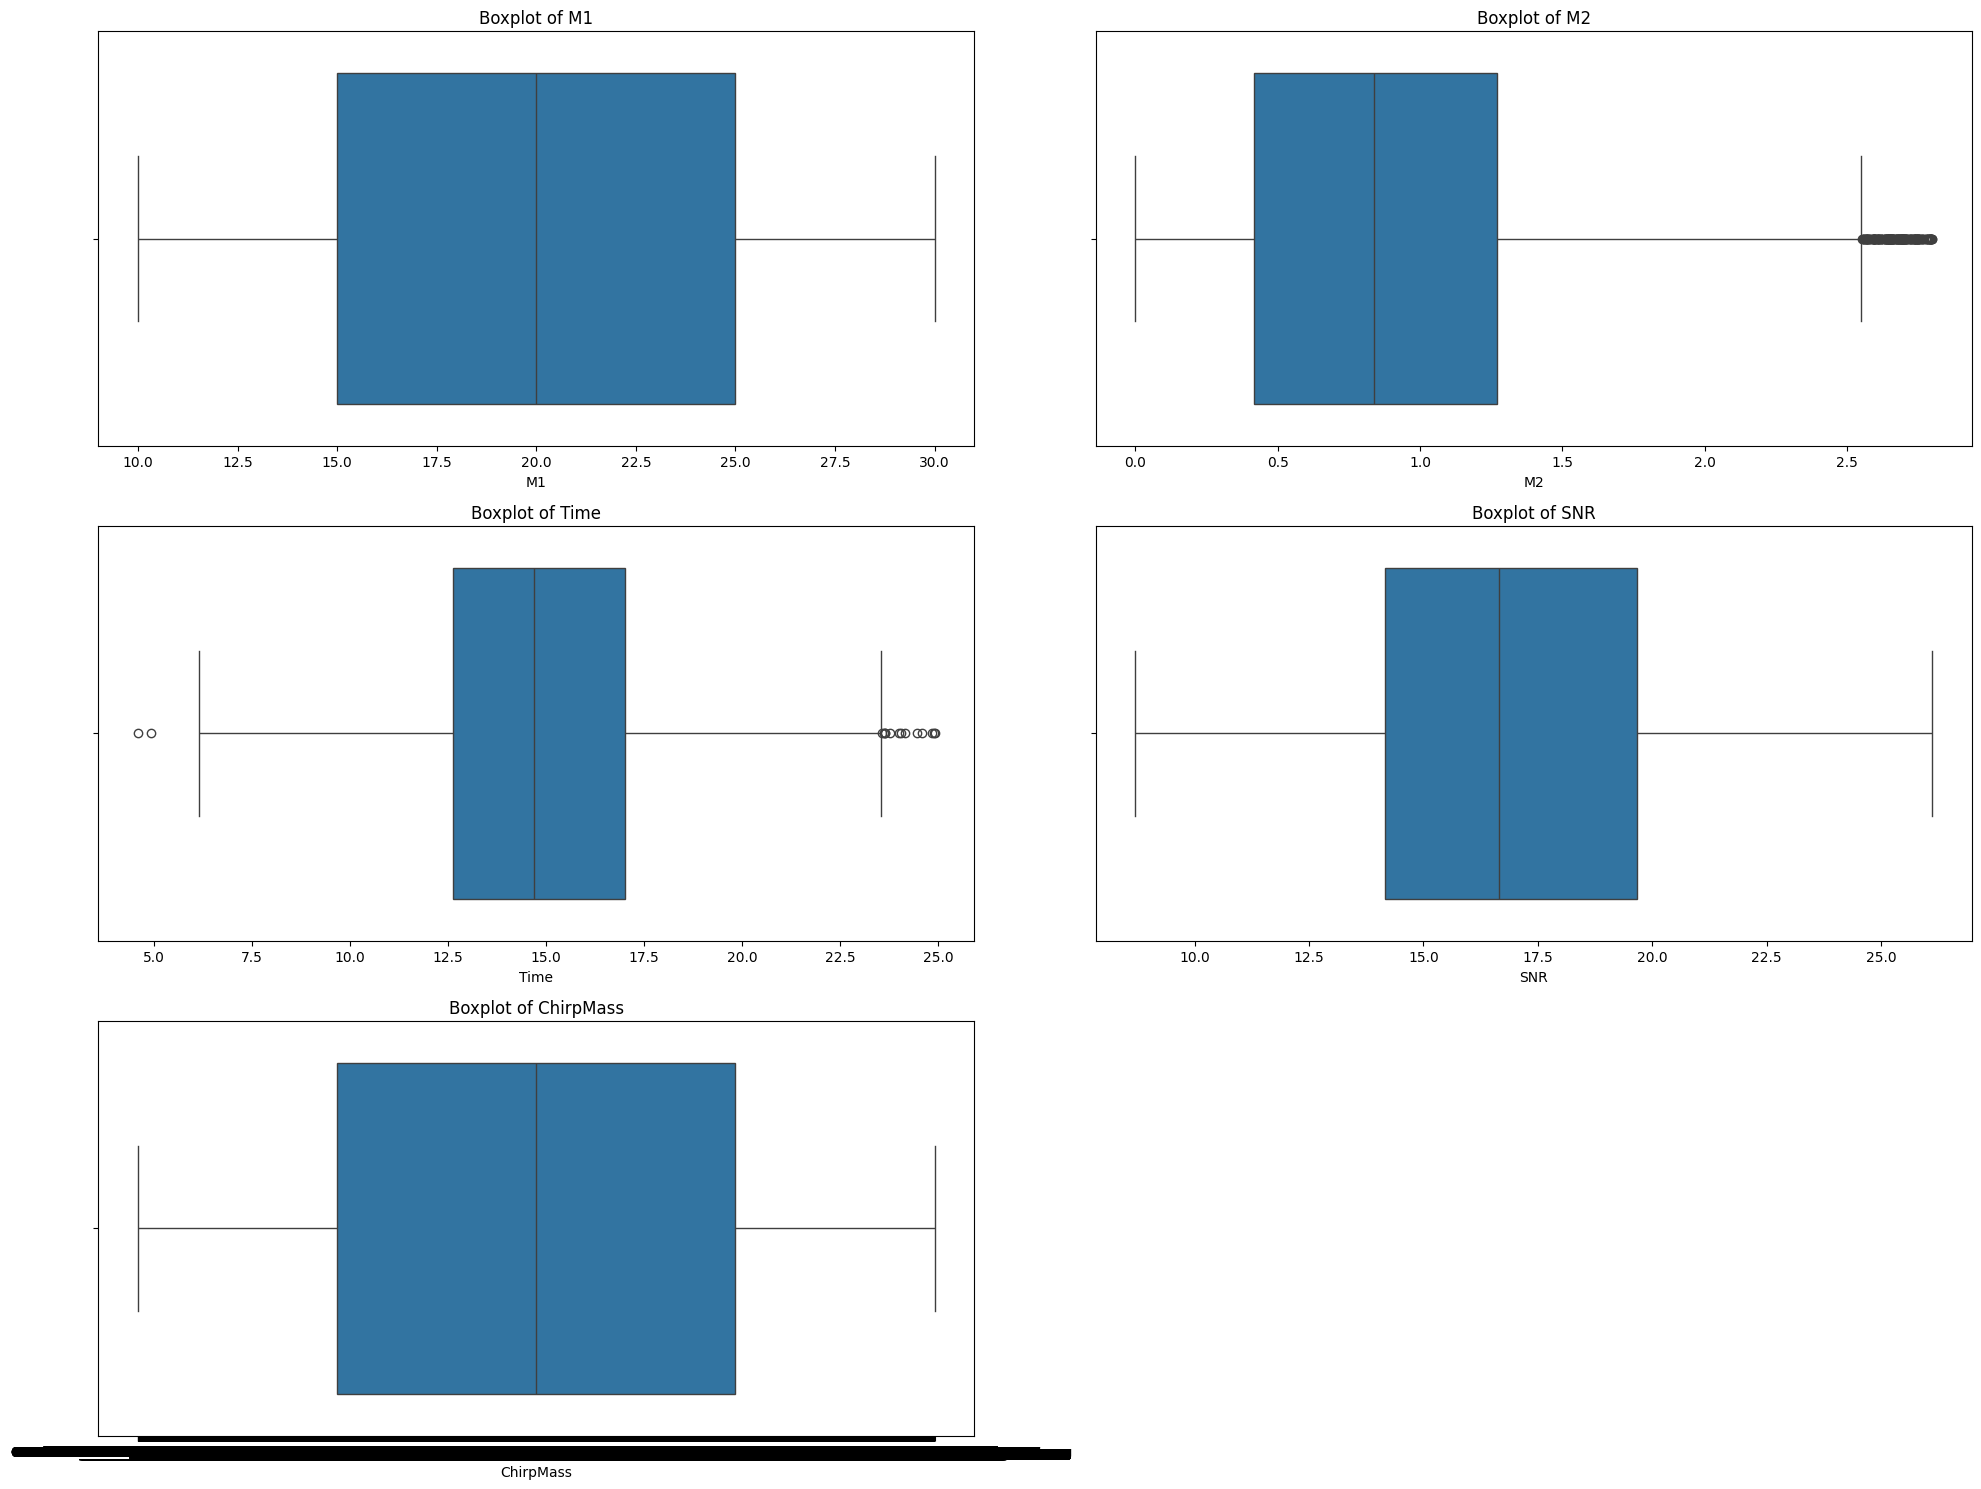

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv(
    "/home/arush/GW_Project_1/Data_Generation/Continous_Check/cont_data.csv"
)

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Plot the distribution of each parameter
parameters = ["M1", "M2", "Time", "SNR", "ChirpMass"]

plt.figure(figsize=(20, 15))

for i, param in enumerate(parameters):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[param], kde=True)
    plt.title(f"Distribution of {param}")
    plt.xlabel(param)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Plot boxplots to check for outliers
plt.figure(figsize=(20, 15))

for i, param in enumerate(parameters):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[param])
    plt.title(f"Boxplot of {param}")
    plt.xlabel(param)

plt.tight_layout()
plt.show()

In [ ]:
import random

random_shift_var = random.uniform(0, 0.7)
print(random_shift_var)

0.19675562433594232


In [ ]:
from pycbc.waveform import get_td_waveform
from pycbc.types import TimeSeries
import random
import numpy as np

T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [ ]:
def get_shifted_wvfrm(shift_percent):
    # WVFRM generation

    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=1.0 / 4096,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # Shift the waveform
    total_length = len(hp.sample_times)
    shift_index = int(shift_percent * total_length)
    shifted_data = np.zeros_like(hp.data)
    shift_amount = min(len(hp.data), total_length - shift_index)
    shifted_data[shift_index : shift_index + shift_amount] = hp.data[:shift_amount]
    ts = TimeSeries(shifted_data, delta_t=delta_t)
    return ts, m1, m2, hp

30 10


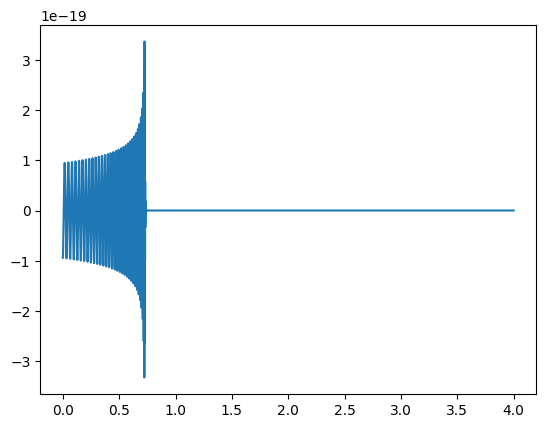

In [ ]:
wave, _, _, _ = get_shifted_wvfrm(0)

plt.plot(wave.sample_times, wave)

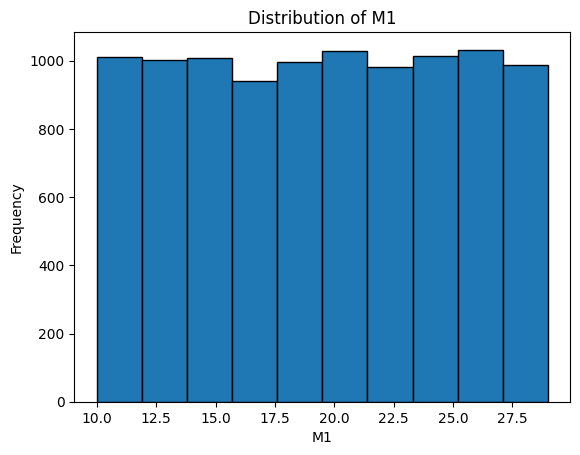

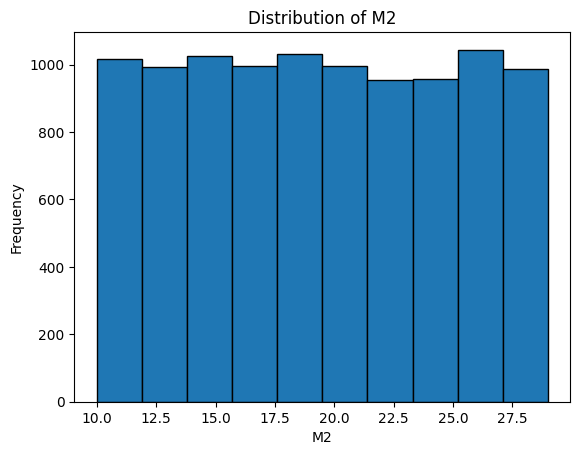

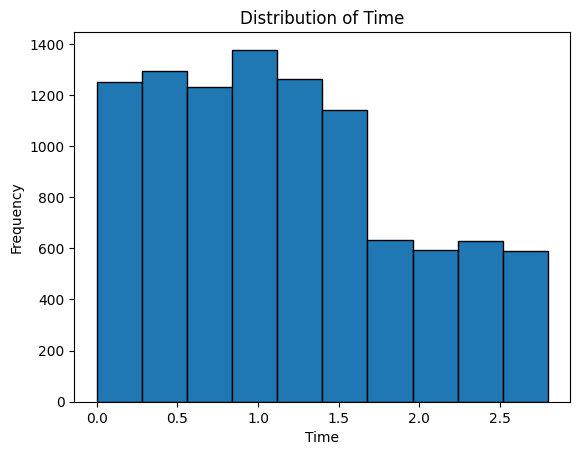

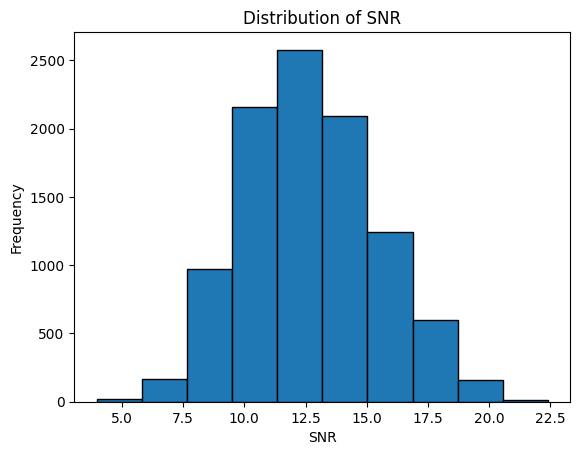

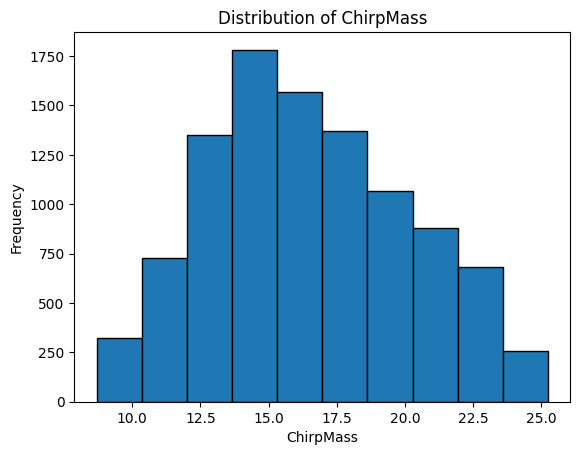

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_histogram_from_csv(file_path, column_name, bins=10):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Check if the specified column exists
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the CSV file.")
        return

    # Extract the specified column
    data = df[column_name]

    # Create a histogram
    plt.hist(data, bins=bins, edgecolor="black")

    # Add titles and labels
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()


# Example usage
file_path = "/home/arush/GW_Project_1/Data_Generation/Continous_Check/cont_data.csv"
# Replace with the actual column name you want to plot
plot_histogram_from_csv(file_path, "M1")
plot_histogram_from_csv(file_path, "M2")
plot_histogram_from_csv(file_path, "Time")
plot_histogram_from_csv(file_path, "SNR")
plot_histogram_from_csv(file_path, "ChirpMass")

(array([6., 2., 0., 0., 1., 0., 0., 1.]),
 array([   0.,  125.,  250.,  375.,  500.,  625.,  750.,  875., 1000.]),
 <BarContainer object of 8 artists>)

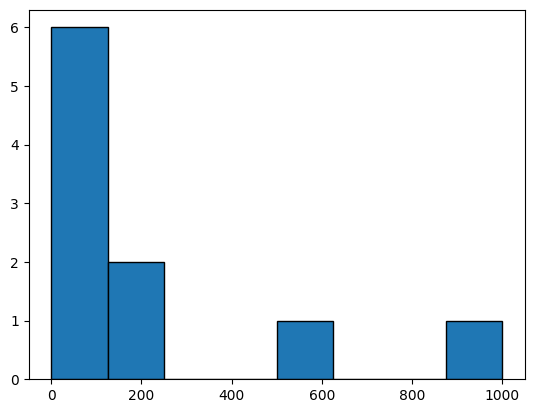

In [9]:
import pylab as plt

x = [0, 0, 0, 10, 10, 10, 200, 200, 500, 1000]

plt.hist(x, edgecolor="black", bins=)